In [1]:
import os
os.add_dll_directory('C:\\Program Files\\IBM\\SQLLIB\\BIN')
# conectar a la base de datos IBM Db2
import ibm_db

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from queries import get_gpa_novatos

In [4]:
conn = ibm_db.connect('DATABASE=' + os.getenv('DATABASE_DAGO') + ';HOSTNAME=' + os.getenv('HOSTNAME') + ';PORT=' + os.getenv('PORT') + ';PROTOCOL=TCPIP;UID=' + os.getenv('USERNAME_DB') + ';PWD=' + os.getenv('PASSWORD_DB') + ';', '', '')
# conn = ibm_db.connect(os.getenv('DATABASE'), os.getenv('USERNAME_DB'), os.getenv('PASSWORD_DB')) # os.getenv('HOSTNAME'), os.getenv('PORT')

if conn:
    print("Conexión exitosa")
else:
    print("Error al conectar")

Conexión exitosa


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
list_names_files = glob.glob("data/materias/all_*")
df_complete = pd.DataFrame()

In [7]:
df_materias = pd.read_csv("data/materias/dificultad_materia.csv")

In [8]:
for file in list_names_files:
    print("file", file)
    split_file = file.split("_")
    termino = split_file[2].split(".")[0]
    if termino == "3S":
        continue
    
    df = pd.read_csv(file)

    df["anio"] = split_file[1]
    df["termino"] = termino
    if not("MATERIA" in df.keys()):
        df = pd.merge(df, df_materias[["CODIGOMATERIA", "MATERIA"]], left_on="COD_MATERIA_ACAD_MO", right_on="CODIGOMATERIA")

    df_complete = pd.concat([df_complete, df], ignore_index=True)

file data/materias\all_2020_1S.csv
file data/materias\all_2020_2S.csv
file data/materias\all_2021_1S.csv
file data/materias\all_2021_2S.csv
file data/materias\all_2022_1S.csv
file data/materias\all_2022_2S.csv
file data/materias\all_2023_1S.csv
file data/materias\all_2023_2S.csv
file data/materias\all_2023_3S.csv
file data/materias\all_2024_1S.csv
file data/materias\all_2024_2S.csv
file data/materias\all_2024_3S.csv
file data/materias\all_2025_1S.csv
file data/materias\all_2025_2S.csv


#### Estadistica

In [9]:
df_complete.shape

(363521, 29)

In [10]:
df_complete["COD_ESTUDIANTE"] = df_complete["COD_ESTUDIANTE"].astype(str)
# change type of df_complete["anio"] to int
df_complete["anio"] = df_complete["anio"].astype(int)
df_complete["termino"] = df_complete["termino"].astype("category")

In [11]:
df_complete.head()

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,GPA_ULTIMO,anio,termino,CODIGOMATERIA,MATERIA
0,201160178,ACUG1035,AP,1,87,93,"9,00","7,90",53.0,59.0,64.0,"6,83",47.0,"7,06",NaN,N,"5,14","4,25","5,35",0,0,2,1,0,NaN,2020,1S,ACUG1035,ACUICULTURA ORNAMENTAL
1,201310353,ACUG1035,AP,1,85,89,"8,70","7,90",59.0,61.0,74.0,"7,48",51.0,"7,94",14.0,S,"4,16","5,20","5,15",0,0,2,1,0,NaN,2020,1S,ACUG1035,ACUICULTURA ORNAMENTAL
2,201313869,ACUG1035,AP,1,86,89,"8,75","7,90",59.0,56.0,67.0,"6,97",50.0,"7,45",13.0,S,"4,27","4,30","4,80",0,1,1,0,1,NaN,2020,1S,ACUG1035,ACUICULTURA ORNAMENTAL
3,201507649,ACUG1035,AP,1,83,93,"8,80","7,90",49.0,65.0,74.0,"7,73",47.0,"7,93",11.0,N,"3,01",NaN,NaN,0,0,2,2,0,NaN,2020,1S,ACUG1035,ACUICULTURA ORNAMENTAL
4,201607884,ACUG1035,AP,1,95,95,"9,50","7,90",39.0,72.0,77.0,"8,02",39.0,"8,02",8.0,N,NaN,NaN,NaN,0,1,1,1,0,NaN,2020,1S,ACUG1035,ACUICULTURA ORNAMENTAL


In [12]:
df_complete["anio"].value_counts()

anio
2020    69957
2021    64013
2022    58366
2025    57492
2024    57197
2023    56496
Name: count, dtype: int64

In [13]:
df_complete["termino"].value_counts()

termino
1S    185408
2S    178113
Name: count, dtype: int64

In [14]:
df_complete.groupby(["anio", "termino"])["termino"].value_counts()

C:\Users\saraujo\AppData\Local\Temp\ipykernel_35016\2266249909.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_complete.groupby(["anio", "termino"])["termino"].value_counts()


anio  termino
2020  1S         35871
      2S         34086
2021  1S         32727
      2S         31286
2022  1S         29507
      2S         28859
2023  1S         28301
      2S         28195
2024  1S         28709
      2S         28488
2025  1S         30293
      2S         27199
Name: count, dtype: int64

C:\Users\saraujo\AppData\Local\Temp\ipykernel_35016\3158848234.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df_complete.groupby(["anio", "termino"]).size().reset_index(name='count')


Datos agrupados por año y término:
    anio termino  count
0   2020      1S  35871
1   2020      2S  34086
2   2021      1S  32727
3   2021      2S  31286
4   2022      1S  29507
5   2022      2S  28859
6   2023      1S  28301
7   2023      2S  28195
8   2024      1S  28709
9   2024      2S  28488
10  2025      1S  30293
11  2025      2S  27199

Tabla pivot:
termino     1S     2S
anio                 
2020     35871  34086
2021     32727  31286
2022     29507  28859
2023     28301  28195
2024     28709  28488
2025     30293  27199


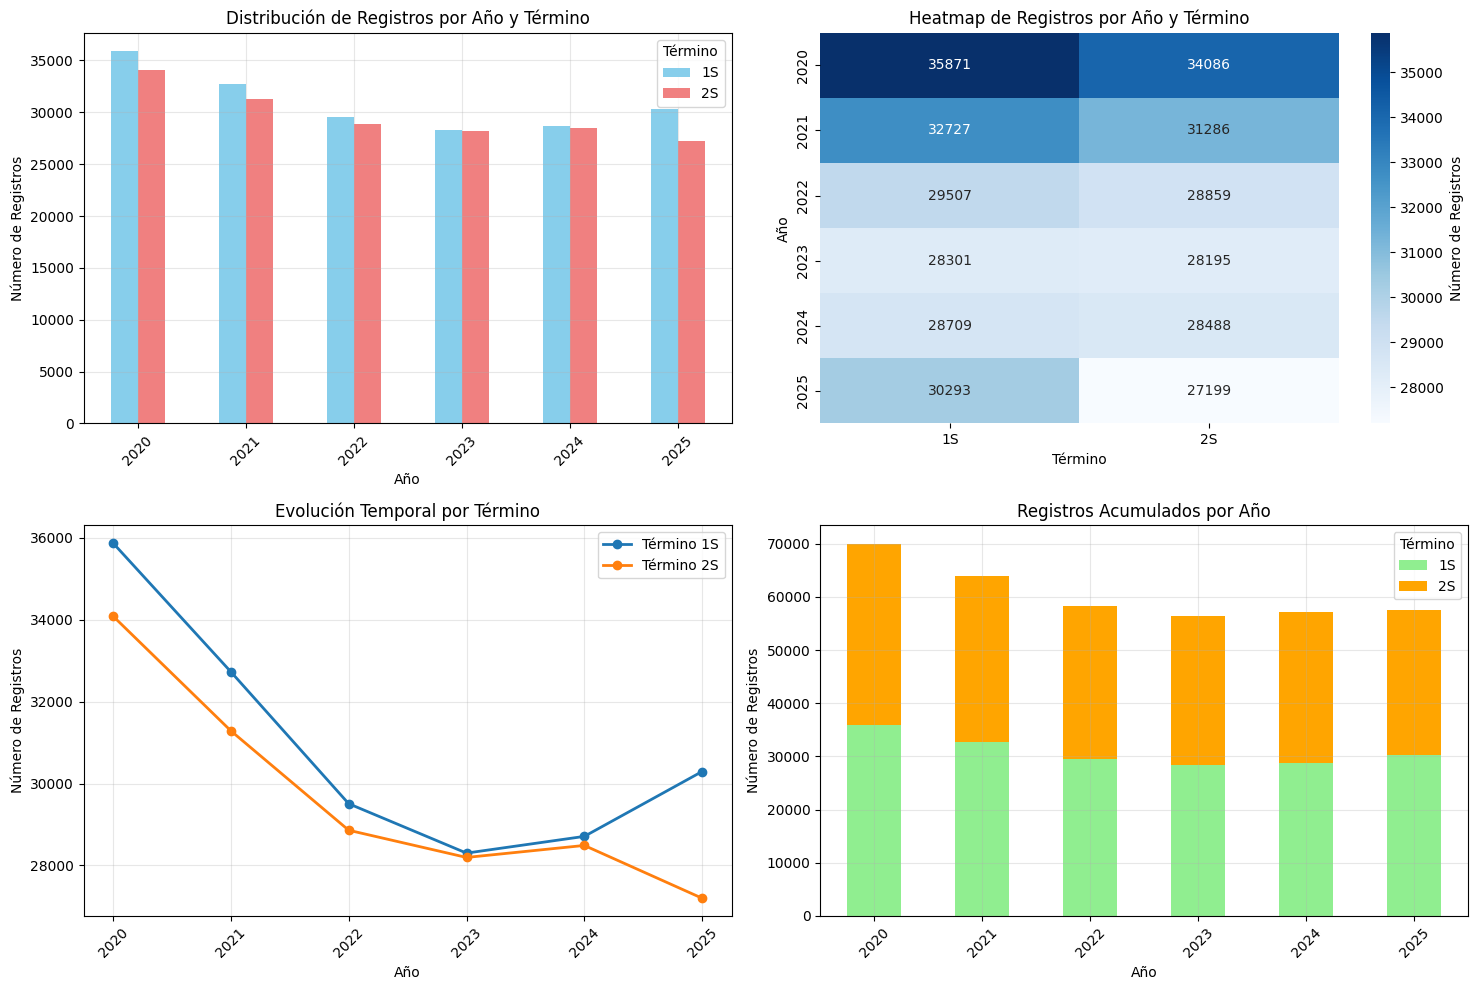


📊 ESTADÍSTICAS GENERALES:
• Total de registros: 363,521
• Años cubiertos: 6
• Términos por año: 2
• Promedio de registros por período: 30293
• Período con más registros: 2020 - 1S (35,871 registros)
• Período con menos registros: 2025 - 2S (27,199 registros)


In [15]:
# Crear el agrupamiento y obtener los conteos
grouped_data = df_complete.groupby(["anio", "termino"]).size().reset_index(name='count')
print("Datos agrupados por año y término:")
print(grouped_data)

# Crear pivot table para mejor visualización
pivot_data = grouped_data.pivot(index='anio', columns='termino', values='count').fillna(0)
print("\nTabla pivot:")
print(pivot_data)

# Crear visualizaciones
plt.figure(figsize=(15, 10))

# 1. Gráfico de barras agrupadas
plt.subplot(2, 2, 1)
pivot_data.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral'])
plt.title('Distribución de Registros por Año y Término')
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.legend(title='Término')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 2. Heatmap
plt.subplot(2, 2, 2)
sns.heatmap(pivot_data, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Número de Registros'})
plt.title('Heatmap de Registros por Año y Término')
plt.ylabel('Año')
plt.xlabel('Término')

# 3. Gráfico de líneas
plt.subplot(2, 2, 3)
for termino in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[termino], marker='o', label=f'Término {termino}', linewidth=2)
plt.title('Evolución Temporal por Término')
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 4. Gráfico de barras apiladas
plt.subplot(2, 2, 4)
pivot_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightgreen', 'orange'])
plt.title('Registros Acumulados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.legend(title='Término')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"• Total de registros: {grouped_data['count'].sum():,}")
print(f"• Años cubiertos: {len(pivot_data.index)}")
print(f"• Términos por año: {len(pivot_data.columns)}")
print(f"• Promedio de registros por período: {grouped_data['count'].mean():.0f}")
print(f"• Período con más registros: {grouped_data.loc[grouped_data['count'].idxmax(), 'anio']} - {grouped_data.loc[grouped_data['count'].idxmax(), 'termino']} ({grouped_data['count'].max():,} registros)")
print(f"• Período con menos registros: {grouped_data.loc[grouped_data['count'].idxmin(), 'anio']} - {grouped_data.loc[grouped_data['count'].idxmin(), 'termino']} ({grouped_data['count'].min():,} registros)")

In [16]:
df_complete["COD_ESTUDIANTE"].nunique()

18009

##### Materias menos de 10 veces vista

In [17]:
df_complete["COD_MATERIA_ACAD_MO"].value_counts()

COD_MATERIA_ACAD_MO
CCPG1043      11477
MATG1045      10656
INDG1033       9183
ADMG1005       8522
FISG1005       8215
              ...  
LOGT3002         16
OCET3002         16
LOGT3007         16
GEOG1038          7
EDCOM00281        2
Name: count, Length: 707, dtype: int64

In [18]:
df_count_materia = df_complete["COD_MATERIA_ACAD_MO"].value_counts()
res_grades = df_count_materia[df_count_materia < 15]
res_grades.shape

(2,)

In [19]:
filter_name_materias = df_complete[df_complete["COD_MATERIA_ACAD_MO"].isin(res_grades.keys().to_list())]
filter_name_materias["MATERIA"].value_counts()

MATERIA
LEGISLACIÓN Y MITIGACIÓN AMBIENTAL    7
GESTIÓN Y CONTROL DE PROYECTOS        2
Name: count, dtype: int64

In [20]:
filter_name_materias.groupby(["anio", "termino"])["COD_ESTUDIANTE"].count()

C:\Users\saraujo\AppData\Local\Temp\ipykernel_35016\3431018063.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filter_name_materias.groupby(["anio", "termino"])["COD_ESTUDIANTE"].count()


anio  termino
2020  1S         2
      2S         0
2023  1S         0
      2S         3
2024  1S         0
      2S         4
Name: COD_ESTUDIANTE, dtype: int64

In [21]:
filter_name_materias[filter_name_materias["MATERIA"] == "GESTIÓN Y CONTROL DE PROYECTOS"].head()

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,GPA_ULTIMO,anio,termino,CODIGOMATERIA,MATERIA
12513,201212655,EDCOM00281,AP,2,63,71,"6,70","7,38",63.0,39.0,61.0,"6,34",51.0,"7,19",NaN,N,"2,74",NaN,NaN,0,0,0,1,0,NaN,2020,1S,EDCOM00281,GESTIÓN Y CONTROL DE PROYECTOS
12514,200909331,EDCOM00281,AP,1,77,84,"8,05","7,38",53.0,35.0,58.0,"6,16",37.0,"7,03",NaN,N,"3,91","5,16",NaN,0,0,0,1,2,NaN,2020,1S,EDCOM00281,GESTIÓN Y CONTROL DE PROYECTOS


##### Estudiantes que aparecen solo una vez

In [22]:
df_count_estudiante = df_complete["COD_ESTUDIANTE"].value_counts()
res_student = df_count_estudiante[df_count_estudiante < 2]
res_student.shape

(557,)

In [23]:
res_student.head()

COD_ESTUDIANTE
202590170    1
202590337    1
202570040    1
202590105    1
202570396    1
Name: count, dtype: int64

In [24]:
filter_students = df_complete[df_complete["COD_ESTUDIANTE"].isin(res_student.keys().to_list())]
filter_students.head()

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,GPA_ULTIMO,anio,termino,CODIGOMATERIA,MATERIA
75,201305603,ACUG1043,AP,1,88,79,"8,33","7,55",65.0,62.0,70.0,"7,36",57.0,"7,78",14.0,N,"4,39","4,38",NaN,1,0,0,1,0,NaN,2020,1S,ACUG1043,HERRAMIENTAS PARA EL DIAGNÓSTICO DE ENFERMEDAD...
91,201502674,ACUG1043,AP,1,88,75,"8,10","7,55",55.0,66.0,80.0,"8,24",54.0,"8,29",12.0,N,"5,30",NaN,NaN,1,0,0,1,0,NaN,2020,1S,ACUG1043,HERRAMIENTAS PARA EL DIAGNÓSTICO DE ENFERMEDAD...
96,201312175,ACUG1045,AP,1,90,84,"8,61","7,97",76.0,60.0,66.0,"6,97",63.0,"7,59",14.0,S,"3,96","2,90","5,03",1,0,1,0,0,NaN,2020,1S,ACUG1045,PRODUCCIÓN ACUÍCOLA II
100,201502694,ACUG1045,AP,1,99,86,"9,05","7,97",53.0,68.0,76.0,"7,96",52.0,"8,01",11.0,N,"5,40",NaN,NaN,1,0,1,0,0,NaN,2020,1S,ACUG1045,PRODUCCIÓN ACUÍCOLA II
104,201507679,ACUG1045,AP,1,98,85,"8,95","7,97",51.0,69.0,76.0,"8,05",50.0,"8,10",10.0,N,"5,45",NaN,NaN,1,0,1,0,0,NaN,2020,1S,ACUG1045,PRODUCCIÓN ACUÍCOLA II


In [25]:
filter_students.groupby(["anio", "ESTADO_MAT_TOMADA_MO"])["COD_ESTUDIANTE"].count()

anio  ESTADO_MAT_TOMADA_MO
2020  AP                      359
      RP                       23
2021  AP                       16
      RP                        5
2022  AP                       13
      PF                        1
      RP                       13
2023  AP                       16
      PF                        6
      RP                        9
2024  AP                       22
      PF                        2
      RP                       14
2025  AC                       39
      AP                        9
      RP                       10
Name: COD_ESTUDIANTE, dtype: int64

In [26]:
filter_students["ESTADO_MAT_TOMADA_MO"].value_counts()

ESTADO_MAT_TOMADA_MO
AP    435
RP     74
AC     39
PF      9
Name: count, dtype: int64

In [27]:
filter_students["MATERIA"].value_counts()

MATERIA
DISEÑO DE PLANTAS                                   52
EMPRENDIMIENTO E INNOVACIÓN                         23
DISEÑO DE PLANTAS ALIMENTARIAS                      17
MANTENIMIENTO INDUSTRIAL                            16
INGLÉS V                                            16
                                                    ..
INTRODUCCIÓN A LA HISTORIA Y ETNOHISTORIA            1
EXPLOTACIÓN SUBTERRÁNEA                              1
METODOLOGÍA DE LA INVESTIGACIÓN EN COMPUTACIÓN       1
ANÁLISIS FINANCIERO                                  1
GESTIÓN Y MARCO REGULATORIO DEL SECTOR ELÉCTRICO     1
Name: count, Length: 151, dtype: int64

In [28]:
print("="*80)
print("ANÁLISIS DE ESTUDIANTES POR AÑO Y ESTADO ACADÉMICO")
print("="*80)

# 1. Estudiantes únicos por año
estudiantes_por_anio = df_complete.groupby('anio')['COD_ESTUDIANTE'].nunique().reset_index()
estudiantes_por_anio.columns = ['anio', 'estudiantes_unicos']
print("\n📊 Estudiantes únicos por año:")
print(estudiantes_por_anio)

# 2. Análisis de estados académicos por estudiante
estados_por_estudiante = df_complete.groupby(['COD_ESTUDIANTE', 'ESTADO_MAT_TOMADA_MO']).size().unstack(fill_value=0)

# Verificar qué columnas de estado existen
print(f"\nEstados académicos disponibles: {estados_por_estudiante.columns.tolist()}")

# Calcular totales por estudiante
if 'RP' in estados_por_estudiante.columns and 'AP' in estados_por_estudiante.columns:
    estados_por_estudiante['Total_RP'] = estados_por_estudiante['RP']
    estados_por_estudiante['Total_AP'] = estados_por_estudiante['AP']
    
    # Top estudiantes con más reprobadas
    top_rp = estados_por_estudiante.nlargest(10, 'Total_RP')[['Total_RP', 'Total_AP']]
    print(f"\n⚠️ Top 10 estudiantes con más materias REPROBADAS:")
    for i, (cod_est, row) in enumerate(top_rp.iterrows(), 1):
        print(f"{i}. Estudiante {cod_est}: {row['Total_RP']} RP, {row['Total_AP']} AP")
    
    # Top estudiantes con más aprobadas
    top_ap = estados_por_estudiante.nlargest(10, 'Total_AP')[['Total_RP', 'Total_AP']]
    print(f"\n✅ Top 10 estudiantes con más materias APROBADAS:")
    for i, (cod_est, row) in enumerate(top_ap.iterrows(), 1):
        print(f"{i}. Estudiante {cod_est}: {row['Total_AP']} AP, {row['Total_RP']} RP")

# Crear visualizaciones
plt.figure(figsize=(18, 12))

# Gráfico 1: Estudiantes únicos por año
plt.subplot(2, 3, 1)
plt.bar(estudiantes_por_anio['anio'], estudiantes_por_anio['estudiantes_unicos'], 
        color='steelblue', alpha=0.7, edgecolor='black')
plt.title('Estudiantes Únicos Inscritos por Año', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Número de Estudiantes Únicos')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Agregar valores encima de las barras
for i, v in enumerate(estudiantes_por_anio['estudiantes_unicos']):
    plt.text(i, v + max(estudiantes_por_anio['estudiantes_unicos'])*0.01, 
             f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Top estudiantes con más RP
if 'RP' in estados_por_estudiante.columns:
    plt.subplot(2, 3, 2)
    top_rp_plot = estados_por_estudiante.nlargest(15, 'Total_RP')
    estudiantes_labels = [f'Est_{i+1}' for i in range(len(top_rp_plot))]
    
    plt.bar(range(len(top_rp_plot)), top_rp_plot['Total_RP'], 
            color='red', alpha=0.7, edgecolor='black')
    plt.title('Top 15 Estudiantes con Más\nMaterias Reprobadas (RP)', fontsize=14, fontweight='bold')
    plt.xlabel('Estudiantes')
    plt.ylabel('Número de Materias Reprobadas')
    plt.xticks(range(len(top_rp_plot)), estudiantes_labels, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Agregar valores encima de las barras
    for i, v in enumerate(top_rp_plot['Total_RP']):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Top estudiantes con más AP
if 'AP' in estados_por_estudiante.columns:
    plt.subplot(2, 3, 3)
    top_ap_plot = estados_por_estudiante.nlargest(15, 'Total_AP')
    estudiantes_labels_ap = [f'Est_{i+1}' for i in range(len(top_ap_plot))]
    
    plt.bar(range(len(top_ap_plot)), top_ap_plot['Total_AP'], 
            color='green', alpha=0.7, edgecolor='black')
    plt.title('Top 15 Estudiantes con Más\nMaterias Aprobadas (AP)', fontsize=14, fontweight='bold')
    plt.xlabel('Estudiantes')
    plt.ylabel('Número de Materias Aprobadas')
    plt.xticks(range(len(top_ap_plot)), estudiantes_labels_ap, rotation=45)
    plt.grid(True, alpha=0.3)
    
    # Agregar valores encima de las barras
    for i, v in enumerate(top_ap_plot['Total_AP']):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

# Gráfico 4: Evolución temporal de estudiantes únicos
plt.subplot(2, 3, 4)
plt.plot(estudiantes_por_anio['anio'], estudiantes_por_anio['estudiantes_unicos'], 
         marker='o', linewidth=3, markersize=8, color='purple')
plt.title('Evolución Temporal de\nEstudiantes Únicos', fontsize=14, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Estudiantes Únicos')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Gráfico 5: Distribución de estados académicos (histograma)
if 'RP' in estados_por_estudiante.columns and 'AP' in estados_por_estudiante.columns:
    plt.subplot(2, 3, 5)
    plt.hist([estados_por_estudiante['Total_RP'], estados_por_estudiante['Total_AP']], 
             bins=20, alpha=0.7, label=['Reprobadas (RP)', 'Aprobadas (AP)'], 
             color=['red', 'green'], edgecolor='black')
    plt.title('Distribución de Materias\npor Estudiante', fontsize=14, fontweight='bold')
    plt.xlabel('Número de Materias')
    plt.ylabel('Número de Estudiantes')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Gráfico 6: Relación RP vs AP (scatter plot)
if 'RP' in estados_por_estudiante.columns and 'AP' in estados_por_estudiante.columns:
    plt.subplot(2, 3, 6)
    plt.scatter(estados_por_estudiante['Total_AP'], estados_por_estudiante['Total_RP'], 
                alpha=0.6, color='orange', edgecolors='black', s=30)
    plt.title('Relación Materias Aprobadas\nvs Reprobadas', fontsize=14, fontweight='bold')
    plt.xlabel('Materias Aprobadas (AP)')
    plt.ylabel('Materias Reprobadas (RP)')
    plt.grid(True, alpha=0.3)
    
    # Línea de tendencia
    z = np.polyfit(estados_por_estudiante['Total_AP'], estados_por_estudiante['Total_RP'], 1)
    p = np.poly1d(z)
    plt.plot(estados_por_estudiante['Total_AP'], p(estados_por_estudiante['Total_AP']), 
             "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print(f"\n📈 ESTADÍSTICAS GENERALES:")
print(f"• Total de estudiantes únicos en el dataset: {df_complete['COD_ESTUDIANTE'].nunique():,}")
print(f"• Año con más estudiantes nuevos: {estudiantes_por_anio.loc[estudiantes_por_anio['estudiantes_unicos'].idxmax(), 'anio']} ({estudiantes_por_anio['estudiantes_unicos'].max():,} estudiantes)")
print(f"• Año con menos estudiantes nuevos: {estudiantes_por_anio.loc[estudiantes_por_anio['estudiantes_unicos'].idxmin(), 'anio']} ({estudiantes_por_anio['estudiantes_unicos'].min():,} estudiantes)")

if 'RP' in estados_por_estudiante.columns and 'AP' in estados_por_estudiante.columns:
    print(f"• Promedio de materias reprobadas por estudiante: {estados_por_estudiante['Total_RP'].mean():.2f}")
    print(f"• Promedio de materias aprobadas por estudiante: {estados_por_estudiante['Total_AP'].mean():.2f}")
    print(f"• Estudiante con más reprobadas: {estados_por_estudiante['Total_RP'].max()} materias")
    print(f"• Estudiante con más aprobadas: {estados_por_estudiante['Total_AP'].max()} materias")

ANÁLISIS DE ESTUDIANTES POR AÑO Y ESTADO ACADÉMICO

📊 Estudiantes únicos por año:
   anio  estudiantes_unicos
0  2020                9926
1  2021                9208
2  2022                8900
3  2023                8770
4  2024                8566
5  2025                8164

Estados académicos disponibles: ['AC', 'AP', 'PF', 'RP']

⚠️ Top 10 estudiantes con más materias REPROBADAS:
1. Estudiante 202007803: 28 RP, 12 AP
2. Estudiante 201804978: 22 RP, 7 AP
3. Estudiante 201710787: 21 RP, 15 AP
4. Estudiante 201903556: 21 RP, 19 AP
5. Estudiante 201907508: 21 RP, 21 AP
6. Estudiante 201911666: 21 RP, 10 AP
7. Estudiante 201515973: 20 RP, 3 AP
8. Estudiante 201916194: 19 RP, 22 AP
9. Estudiante 201908258: 18 RP, 11 AP
10. Estudiante 202008058: 18 RP, 19 AP

✅ Top 10 estudiantes con más materias APROBADAS:
1. Estudiante 202003026: 49 AP, 4 RP
2. Estudiante 202009411: 49 AP, 2 RP
3. Estudiante 202000329: 47 AP, 3 RP
4. Estudiante 202000550: 47 AP, 1 RP
5. Estudiante 202000303: 46 AP, 1 R

C:\Users\saraujo\AppData\Local\Temp\ipykernel_35016\302040698.py:126: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()



📈 ESTADÍSTICAS GENERALES:
• Total de estudiantes únicos en el dataset: 18,009
• Año con más estudiantes nuevos: 2020 (9,926 estudiantes)
• Año con menos estudiantes nuevos: 2025 (8,164 estudiantes)
• Promedio de materias reprobadas por estudiante: 2.25
• Promedio de materias aprobadas por estudiante: 16.38
• Estudiante con más reprobadas: 28 materias
• Estudiante con más aprobadas: 49 materias


##### Mas de una vez visto

In [29]:
df_complete[df_complete["VEZ_TOMADA_MO"] > 1]

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,GPA_ULTIMO,anio,termino,CODIGOMATERIA,MATERIA
12513,201212655,EDCOM00281,AP,2,63,71,"6,70","7,38",63.0,39.0,61.0,"6,34",51.0,"7,19",NaN,N,"2,74",NaN,NaN,0,0,0,1,0,NaN,2020,1S,EDCOM00281,GESTIÓN Y CONTROL DE PROYECTOS
35884,201807286,ACUG1036,AP,2,76,66,"6,89","6,74",28.0,61.0,54.0,"6,31",21.0,"7,43",6.0,N,"2,96",NaN,NaN,0,0,0,0,2,NaN,2020,2S,ACUG1036,ANÁLISIS DE DATOS ACUÍCOLAS
35927,201301569,ACUG1043,RP,2,19,0,"0,66","7,55",70.0,56.0,57.0,"6,25",55.0,"7,24",14.0,N,"2,64",NaN,NaN,0,0,0,1,1,NaN,2020,2S,ACUG1043,HERRAMIENTAS PARA EL DIAGNÓSTICO DE ENFERMEDAD...
35930,201514209,ACUG1043,AP,2,72,80,"7,42","7,55",51.0,64.0,73.0,"7,47",47.0,"7,74",11.0,N,"4,25",NaN,NaN,0,0,1,1,0,NaN,2020,2S,ACUG1043,HERRAMIENTAS PARA EL DIAGNÓSTICO DE ENFERMEDAD...
36139,201412889,ADMG1005,AP,2,84,94,"9,14","7,45",68.0,55.0,59.0,"6,36",49.0,"7,32",13.0,N,"4,08",NaN,NaN,0,0,0,2,2,NaN,2020,2S,ADMG1005,EMPRENDIMIENTO E INNOVACIÓN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363454,202400339,TURG2035,AC,3,0,0,"0,00","6,02",14.0,62.0,70.0,"6,90",10.0,"7,85",4.0,N,"4,08","5,94",NaN,0,0,0,0,3,"7,73",2025,2S,TURG2035,GEOGRAFÍA TURÍSTICA
363459,202204319,TURG2036,AC,2,0,0,"0,00","6,85",24.0,48.0,40.0,"4,84",10.0,"6,81",8.0,N,"4,03","3,32","1,10",0,0,0,0,2,"6,81",2025,2S,TURG2036,TEORÍA DEL TURISMO
363469,202400289,TURG2036,AC,2,0,0,"0,00","6,85",14.0,60.0,55.0,"5,94",9.0,"7,26",4.0,N,"3,58",NaN,NaN,0,0,0,0,3,"7,15",2025,2S,TURG2036,TEORÍA DEL TURISMO
363483,202401048,TURG2036,AC,2,0,0,"0,00","6,85",14.0,65.0,64.0,"6,98",11.0,"7,41",4.0,N,"5,41",NaN,NaN,0,0,0,0,4,"7,41",2025,2S,TURG2036,TEORÍA DEL TURISMO


#### Los de socioeconomico

In [30]:
# df_socioeconomico = pd.read_csv("data/materias/socioeconomico_16741.csv")
df_socioeconomico = pd.read_csv("data/materias/socioeconomico_17897.csv")

C:\Users\saraujo\AppData\Local\Temp\ipykernel_35016\3811954557.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_socioeconomico = pd.read_csv("data/materias/socioeconomico_17897.csv")


In [31]:
df_socioeconomico.shape

(17897, 76)

In [32]:
df_socioeconomico['CODESTUDIANTE'] = df_socioeconomico['CODESTUDIANTE'].astype(str)
df_socioeconomico['NUMEROIDENTIFICACION'] = df_socioeconomico['NUMEROIDENTIFICACION'].astype(str).str.strip().str.upper()

# Extraer el año de ANIO_TERMINO_INGRESO (formato "2002 1S" -> 2002)
df_socioeconomico['anio_ingreso'] = df_socioeconomico['ANIO_TERMINO_INGRESO'].str.split(' ').str[0].astype(int)
df_socioeconomico['termino_ingreso'] = df_socioeconomico['ANIO_TERMINO_INGRESO'].str.split(' ').str[1].astype(str)

In [33]:
df_socioeconomico.head()

,CODESTUDIANTE,NUMEROIDENTIFICACION,APELLIDOS,NOMBRES,EMAIL,ANIO_TERMINO_INGRESO,CATEGORIA,ISE,CARRERA,UNIDAD,TIENEDISCAPACIDAD,SEXO,AUTOIDENTIFICACIONGENERO,AUTOIDENTIFICACIONETNICA,ESTADOCIVIL,FECHANACIMIENTO,PAISNACIMIENTO,PROVINCIANACIMIENTO,CIUDADNACIMIENTO,COLEGIO,PAISCOLEGIO,PROVINCIACOLEGIO,CANTONCOLEGIO,TIPOCOLEGIO,ANIOGRADUACION,CATEGORIACOLEGIO,JORNADA,BECACOLEGIO,OTROSIDIOMAS,COMIDASALDIA,CONSUMODIARIOESPOL,TIEMPOPROMEDIOLLEGARESPOL,VECESBUSENTRADA,VECESCARROENTRADA,BICICLETAENTRADA,VECESTAXIENTRADA,VECESCARROMOTOAMIGOENTRADA,VECESTRICIMOTOENTRADA,CAMINAENTRADA,VECESBUSSALIDA,VECESCARROSALIDA,BICICLETASALIDA,VECESTAXISALIDA,VECESCARROMOTOAMIGOSALIDA,VECESTRICIMOTOSALIDA,CAMINASALIDA,NIVELINGLES,POSEETARJETACREDITO,POSEETARJETADEBITO,ALIMENTACION,TRANSPORTE,NIVELINSTRUCCIONPADRE,NIVELINSTRUCCIONMADRE,ESTADOCIVILPADRES,DISCAPACIDAD,FAMILIARDISCAPACIDAD,ENFERMEDAD,FAMILIARENFERMEDAD,RECIBEBONO,DIFICULTADAPRENDIZAJE,PAISVIVE,PROVINCIAVIVE,CIUDADVIVE,TIPOVIVIENDASEP,CANTIDADCUARTOS,CANTIDADBANIO,METERIALTECHOVIVIENDASEP,METERIALPAREDVIVIENDASEP,VIAACCESOVIVIENDASEP,ABASTECIMIENTOAGUA,RECIBEAYUDA,VALORAYUDA,TIPOBACHILLER,COMIDAS,DISPOSITIVOS,ACCESOINTERNET,anio_ingreso,termino_ingreso
0,199722414,0918644931,ESPINOZA BRAVO,ELIANA LORENA,elespino@espol.edu.ec,1997 3S,4.0,0.7758,Nutrición y Dietética,Facultad de Ciencias de la Vida,N,Femenino,femenino,Mestizo,casado,1978-07-21,ECUADOR,GUAYAS,GUAYAQUIL,FRANCISCO CAMPOS COELLO GUAYAQUIL,ECUADOR,GUAYAS,GUAYAQUIL,Fiscal,1995.0,1.0,MATUTINA (07:00-14:00 APROX.),Ninguna,SI,3,5,31 a 60 minutos,0,0,0,1,0,0,0,1,0,0,1,0,0,0,INTERMEDIO,SI,SI,600,200,Superior Universitaria completa,"Post-grado (maestría, doctorado, post-doctorado)",Casados,NO,NaN,NO,NaN,NO,NaN,ECUADOR,GUAYAS,DAULE,Casa/Villa,3,2,Hormigón/losa/cemento,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,RED PÚBLICA LAS 24 HORAS,NO,0.0,Bachillerato en Ciencias,DESAYUNO;ALMUERZO;MERIENDA,CELULAR,WIFI EXCLUSIVO DE LA VIVIENDA,1997,3S
1,200102978,0920502713,ASCENCIO BURGOS,REINALDO MAURICIO,mascenci@espol.edu.ec,2001 1S,2.0,0.4403,Producción para Medios de Comunicación,"Facultad de Arte, Diseño y Comunicación Audiov...",N,Masculino,masculino,Mestizo,soltero,1981-01-29,ECUADOR,GUAYAS,GUAYAQUIL,SIMON BOLIVAR,ECUADOR,GUAYAS,GUAYAQUIL,Fiscal,1998.0,8.0,MATUTINA (07:00-14:00 APROX.),Ninguna,NO,3,0,31 a 60 minutos,2,0,0,0,0,0,0,2,0,0,0,0,0,0,NaN,NO,SI,300,100,Superior no Universitaria (tecnología o técnic...,Secundaria Completa,Unión de Hecho,NO,NaN,NO,NaN,NO,NaN,ECUADOR,GUAYAS,GUAYAQUIL,Casa/Villa,3,1,Hormigón/losa/cemento,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,RED PÚBLICA LAS 24 HORAS,NO,0.0,Bachiller Técnico,DESAYUNO;ALMUERZO,CELULAR,PLAN DE DATOS MÓVILES,2001,1S
2,200123669,0921222832,SILVESTRE DE LA CRUZ,MARY JAZMIN,msilvest@espol.edu.ec,2001 2S,2.0,0.6032,Computación,Facultad de Ingeniería en Electricidad y Compu...,N,Femenino,femenino,Mestizo,casado,1982-07-02,ECUADOR,SANTA ELENA,SANTA ELENA,RUBIRA SALINAS,ECUADOR,SANTA ELENA,SALINAS,Particular,2000.0,0.0,MATUTINA (07:00-14:00 APROX.),Ninguna,NO,2,0,más de 120 minutos,1,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,SI,NO,300,100,No Sabe,"Post-grado (maestría, doctorado, post-doctorado)",Viudo/a,NO,NaN,NO,NaN,NO,NaN,ECUADOR,SANTA ELENA,SALINAS,Casa/Villa,4,1,Zinc /teja /eternit,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,RED PÚBLICA LAS 24 HORAS,NO,0.0,Bachillerato en Ciencias,DESAYUNO;MERIENDA,PORTÁTIL COMPARTIDA,WIFI COMPARTIDO,2001,2S
3,200123768,0922179510,YAGUAL YÉPEZ,GARY ZACARIAS,gyagual@espol.edu.ec,2001 2S,4.0,0.7230,Electricidad,Facultad de Ingeniería en Electricidad y Compu...,N,Masculino,masculino,Mestizo,soltero,1982-05-24,ECUADOR,GUAYAS,GUAYAQUIL,ACADEMIA NAVAL ALMIRANTE ILLINGWORTH GUAYAQUIL,ECUADOR,GUAYAS,GUAYAQUIL,Particular,2000.0,2.0,MATUTINA (07:00-14:00 APROX.),Ninguna,SI,3,4,más de 120 minutos,0,5,0,0,0,0,0,0,5,0,0,0,0,0,INTERMEDIO,NO,SI,3

In [34]:
df_socioeconomico["CODESTUDIANTE"].nunique()

17810

In [35]:
df_complete["COD_ESTUDIANTE"].nunique()

18009

In [36]:
df_socioeconomico["ANIO_TERMINO_INGRESO"].value_counts()

ANIO_TERMINO_INGRESO
2025 1S    1159
2025 2S    1143
2019 1S    1082
2023 1S     950
2024 1S     932
           ... 
1990 1S       1
1999 2S       1
1992 1S       1
2000 1S       1
1997 2S       1
Name: count, Length: 65, dtype: int64

In [37]:
df_socioeconomico[df_socioeconomico["ANIO_TERMINO_INGRESO"] == "2025 2S"].shape

(1143, 78)

In [38]:
df_socioeconomico[df_socioeconomico["ANIO_TERMINO_INGRESO"] == "2025 1S"].shape

(1159, 78)

In [39]:
# edad de los estidiantes a partir de FECHANACIMIENTO
df_socioeconomico["FECHANACIMIENTO"] = pd.to_datetime(df_socioeconomico["FECHANACIMIENTO"], errors='coerce', format="%Y-%m-%d")
# Calcular la edad
today = pd.Timestamp('now')
df_socioeconomico["edad"] = (today.year - df_socioeconomico["FECHANACIMIENTO"].dt.year)


<Axes: xlabel='edad'>

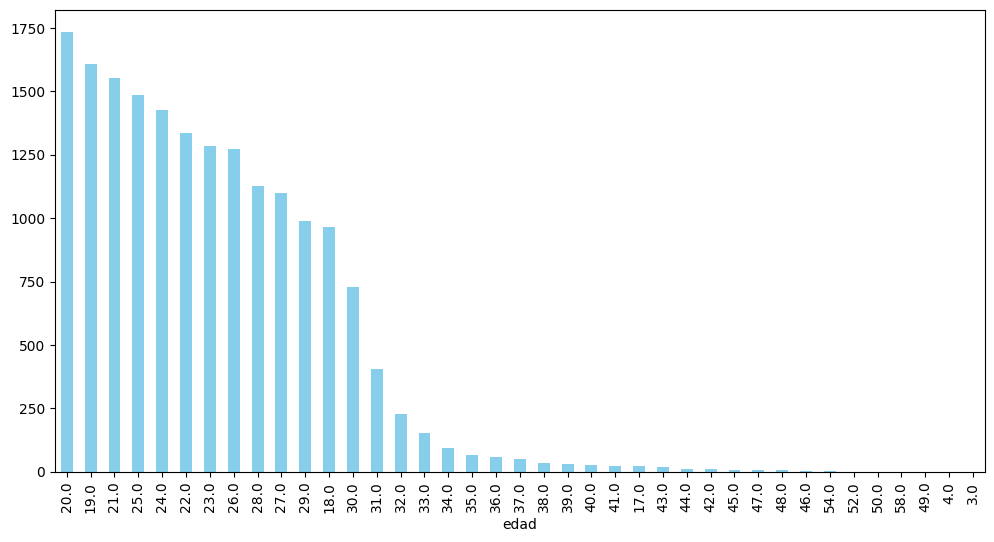

In [40]:
df_socioeconomico["edad"].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')

In [41]:
df_socioeconomico[df_socioeconomico["edad"] < 15]

,CODESTUDIANTE,NUMEROIDENTIFICACION,APELLIDOS,NOMBRES,EMAIL,ANIO_TERMINO_INGRESO,CATEGORIA,ISE,CARRERA,UNIDAD,TIENEDISCAPACIDAD,SEXO,AUTOIDENTIFICACIONGENERO,AUTOIDENTIFICACIONETNICA,ESTADOCIVIL,FECHANACIMIENTO,PAISNACIMIENTO,PROVINCIANACIMIENTO,CIUDADNACIMIENTO,COLEGIO,PAISCOLEGIO,PROVINCIACOLEGIO,CANTONCOLEGIO,TIPOCOLEGIO,ANIOGRADUACION,CATEGORIACOLEGIO,JORNADA,BECACOLEGIO,OTROSIDIOMAS,COMIDASALDIA,CONSUMODIARIOESPOL,TIEMPOPROMEDIOLLEGARESPOL,VECESBUSENTRADA,VECESCARROENTRADA,BICICLETAENTRADA,VECESTAXIENTRADA,VECESCARROMOTOAMIGOENTRADA,VECESTRICIMOTOENTRADA,CAMINAENTRADA,VECESBUSSALIDA,VECESCARROSALIDA,BICICLETASALIDA,VECESTAXISALIDA,VECESCARROMOTOAMIGOSALIDA,VECESTRICIMOTOSALIDA,CAMINASALIDA,NIVELINGLES,POSEETARJETACREDITO,POSEETARJETADEBITO,ALIMENTACION,TRANSPORTE,NIVELINSTRUCCIONPADRE,NIVELINSTRUCCIONMADRE,ESTADOCIVILPADRES,DISCAPACIDAD,FAMILIARDISCAPACIDAD,ENFERMEDAD,FAMILIARENFERMEDAD,RECIBEBONO,DIFICULTADAPRENDIZAJE,PAISVIVE,PROVINCIAVIVE,CIUDADVIVE,TIPOVIVIENDASEP,CANTIDADCUARTOS,CANTIDADBANIO,METERIALTECHOVIVIENDASEP,METERIALPAREDVIVIENDASEP,VIAACCESOVIVIENDASEP,ABASTECIMIENTOAGUA,RECIBEAYUDA,VALORAYUDA,TIPOBACHILLER,COMIDAS,DISPOSITIVOS,ACCESOINTERNET,anio_ingreso,termino_ingreso,edad
13722,202301461,2300344617,BUSTAMANTE VILLAMAR,JOSUE ALEXANDER,josbvill@espol.edu.ec,2023 1S,1.0,0.2599,Administración de Empresas,Facultad de Ciencias Sociales y Humanísticas,N,Masculino,masculino,Mestizo,soltero,2021-12-27,ECUADOR,GUAYAS,GUAYAQUIL,UNIDAD EDUCATIVA FISCAL REPLICA SIMON BOLIVAR,ECUADOR,GUAYAS,GUAYAQUIL,Fiscal,2022.0,8.0,MATUTINA (07:00-14:00 APROX.),Ninguna,NO,3,1,61 a 90 minutos,2,0,0,0,0,0,0,2,0,0,0,0,0,0,BÁSICO,NO,NO,300,15,Secundaria Completa,Secundaria Completa,Casados,NO,NaN,NO,NaN,NO,NaN,ECUADOR,GUAYAS,GUAYAQUIL,Casa/Villa,3,1,Zinc /teja /eternit,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,RED PÚBLICA LAS 24 HORAS,NO,0.0,Bachiller Técnico,DESAYUNO;ALMUERZO;MERIENDA,CELULAR;PORTÁTIL COMPARTIDA,WIFI EXCLUSIVO DE LA VIVIENDA,2023,1S,4.0
14872,202307344,962947800,ALMAO MALVACIAS,DANIEL ALEJANDRO,dalmao@espol.edu.ec,2023 1S,2.0,0.5691,Matemática,Facultad de Ciencias Naturales y Matemáticas,N,Masculino,masculino,Mestizo,soltero,2022-12-07,ECUADOR,GUAYAS,GUAYAQUIL,UNIDAD EDUCATIVA EMANUEL 320,ECUADOR,GUAYAS,GUAYAQUIL,Particular,2023.0,10.0,MATUTINA (07:00-14:00 APROX.),Ninguna,NO,3,2,61 a 90 minutos,2,0,0,0,0,0,0,2,0,0,0,0,0,0,BÁSICO,NO,NaN,400,80,Superior Universitaria completa,"Post-grado (maestría, doctorado, post-doctorado)",Casados,NO,NaN,NO,NaN,NO,NaN,ECUADOR,GUAYAS,GUAYAQUIL,Departamento en edificio,2,3,Hormigón/losa/cemento,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,RED PÚBLICA LAS 24 HORAS,NO,0.0,Bachillerato en Ciencias,DESAYUNO;ALMUERZO;CENA,PORTÁTIL EXCLUSIVA;CELULAR,WIFI EXCLUSIVO DE LA VIVIENDA,2023,1S,3.0


In [42]:
df_socioeconomico[df_socioeconomico["edad"] > 45].shape

(21, 79)

In [43]:
df_merge = pd.merge(df_complete, df_socioeconomico, left_on="COD_ESTUDIANTE", right_on="CODESTUDIANTE", how="inner")

In [44]:
df_merge.shape

(349610, 108)

In [45]:
df_merge.head()

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,GPA_ULTIMO,anio,termino,CODIGOMATERIA,MATERIA,CODESTUDIANTE,NUMEROIDENTIFICACION,APELLIDOS,NOMBRES,EMAIL,ANIO_TERMINO_INGRESO,CATEGORIA,ISE,CARRERA,UNIDAD,TIENEDISCAPACIDAD,SEXO,AUTOIDENTIFICACIONGENERO,AUTOIDENTIFICACIONETNICA,ESTADOCIVIL,FECHANACIMIENTO,PAISNACIMIENTO,PROVINCIANACIMIENTO,CIUDADNACIMIENTO,COLEGIO,PAISCOLEGIO,PROVINCIACOLEGIO,CANTONCOLEGIO,TIPOCOLEGIO,ANIOGRADUACION,CATEGORIACOLEGIO,JORNADA,BECACOLEGIO,OTROSIDIOMAS,COMIDASALDIA,CONSUMODIARIOESPOL,TIEMPOPROMEDIOLLEGARESPOL,VECESBUSENTRADA,VECESCARROENTRADA,BICICLETAENTRADA,VECESTAXIENTRADA,VECESCARROMOTOAMIGOENTRADA,VECESTRICIMOTOENTRADA,CAMINAENTRADA,VECESBUSSALIDA,VECESCARROSALIDA,BICICLETASALIDA,VECESTAXISALIDA,VECESCARROMOTOAMIGOSALIDA,VECESTRICIMOTOSALIDA,CAMINASALIDA,NIVELINGLES,POSEETARJETACREDITO,POSEETARJETADEBITO,ALIMENTACION,TRANSPORTE,NIVELINSTRUCCIONPADRE,NIVELINSTRUCCIONMADRE,ESTADOCIVILPADRES,DISCAPACIDAD,FAMILIARDISCAPACIDAD,ENFERMEDAD,FAMILIARENFERMEDAD,RECIBEBONO,DIFICULTADAPRENDIZAJE,PAISVIVE,PROVINCIAVIVE,CIUDADVIVE,TIPOVIVIENDASEP,CANTIDADCUARTOS,CANTIDADBANIO,METERIALTECHOVIVIENDASEP,METERIALPAREDVIVIENDASEP,VIAACCESOVIVIENDASEP,ABASTECIMIENTOAGUA,RECIBEAYUDA,VALORAYUDA,TIPOBACHILLER,COMIDAS,DISPOSITIVOS,ACCESOINTERNET,anio_ingreso,termino_ingreso,edad
0,201160178,ACUG1035,AP,1,87,93,"9,00","7,90",53.0,59.0,64.0,"6,83",47.0,"7,06",NaN,N,"5,14","4,25","5,35",0,0,2,1,0,NaN,2020,1S,ACUG1035,ACUICULTURA ORNAMENTAL,201160178,925230518,RAMIREZ LARREATEGUI,FRANKLIN ANTONIO,franrami@espol.edu.ec,2011 2S,2.0,0.5050,Acuicultura,Facultad de Ingeniería Marítima y Ciencias del...,N,Masculino,masculino,Mestizo,casado,1993-02-16,ECUADOR,GUAYAS,GUAYAQUIL,LICEO CRISTIANO VESPERTINO GUAYAQUIL,ECUADOR,GUAYAS,GUAYAQUIL,Particular,2010.0,0.0,VESPERTINA (12:00-18:00 APROX.),Excelencia académica,SI,3,2,61 a 90 minutos,1,0,0,0,0,-1,-1,0,0,1,0,0,-1,-1,NaN,SI,NaN,300,60,Superior Universitaria completa,Superior no Universitaria (tecnología o técnic...,Casados,NO,NaN,NO,NaN,NO,NaN,ECUADOR,GUAYAS,GUAYAQUIL,NaN,2,1,Zinc /teja /eternit,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,2011,2S,32.0
1,201310353,ACUG1035,AP,1,85,89,"8,70","7,90",59.0,61.0,74.0,"7,48",51.0,"7,94",14.0,S,"4,16","5,20","5,15",0,0,2,1,0,NaN,2020,1S,ACUG1035,ACUICULTURA ORNAMENTAL,201310353,0930363288,OCHOA CORONEL,LISSETTE STEFANÍA,lissocho@espol.edu.ec,2013 2S,2.0,0.5374,Acuicultura,Facultad de Ingeniería Marítima y Ciencias del...,N,Femenino,femenino,Mestizo,soltero,1995-05-13,ECUADOR,GUAYAS,GUAYAQUIL,FISCAL DOLORES SUCRE GUAYAQUIL.,ECUADOR,GUAYAS,GUAYAQUIL,Fiscal,2013.0,1.0,MATUTINA (07:00-14:00 APROX.),Ninguna,NO,3,0,31 a 60 minutos,3,0,0,0,0,-1,-1,2,0,0,0,0,-1,-1,NaN,NO,SI,300,80,Secundaria Completa,Secundaria Incompleta,Casados,NO,NaN,NO,NaN,NO,NaN,ECUADOR,GUAYAS,GUAYAQUIL,NaN,3,2,Hormigón/losa/cemento,Hormigón / ladrillo / bloque / cemento,Carretera / calle pavimentada o adoquinada / c...,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,2013,2S,30.0
2,201313869,ACUG1035,AP,1,86,89,"8,75","7,90",59.0,56.0,67.0,"6,97",50.0,"7,45",13.0,S,"4,27","4,30","4,80",0,1,1,0,1,NaN,2020,1S,ACUG1035,ACUICULTURA ORNAMENTAL,201313869,0503814386,VILLANUEVA PEREZ,BRYAN RICARDO,bvillanu@espol.edu.ec,2013 2S,2.0,0.4200,Acuicultura,Facultad de Ingeniería Marítima y Ciencias del...,N,Masculino,masculino,Mestizo,soltero,1994-08-09,ECUADOR,LOS RIOS,BABAHOYO,NICOLAS INFANTE DIAZ QUEVEDO,ECUADOR,LOS RIOS,QUEVEDO,Fiscal,2012.0,1.0,VESPERTINA (12:00-18:00 APROX.),Ninguna,SI,2,0,91 a 120 minutos,2,0,2,0,0,-1,0,2,0,2,0,0,-1,0,NaN,SI,NaN,100,50,NaN,NaN,Viudo/a,NO,NaN,NO,NaN,NO,NaN,ECUADOR,LOS RIOS,QUEVEDO,NaN,2,2,Zinc /te

#### Filtro por anio_ingreso que se mas del 2006 para no tener estudiantes super resagados

In [46]:
df_merge_less_2006 = df_merge[df_merge["anio_ingreso"] < 2006].copy()
df_merge = df_merge[df_merge["anio_ingreso"] >= 2006].copy()

In [47]:
df_merge_less_2006["anio_ingreso"].value_counts()

anio_ingreso
2005    172
2004    150
2001    115
1999     80
2002     79
1997     78
2003     69
1998     34
1990     18
1992     17
1996     11
2000      1
Name: count, dtype: int64

In [48]:
df_merge_less_2006.groupby(["COD_ESTUDIANTE", "anio_ingreso"])["anio"].count().to_dict()

{('199002130', 1990): 18,
 ('199201526', 1992): 17,
 ('199609991', 1996): 8,
 ('199613423', 1996): 3,
 ('199708579', 1997): 10,
 ('199715764', 1997): 29,
 ('199721002', 1997): 1,
 ('199722414', 1997): 38,
 ('199801101', 1998): 3,
 ('199802182', 1998): 2,
 ('199802505', 1998): 6,
 ('199813346', 1998): 6,
 ('199816687', 1998): 10,
 ('199819889', 1998): 7,
 ('199903519', 1999): 36,
 ('199907403', 1999): 6,
 ('199912007', 1999): 17,
 ('199912585', 1999): 7,
 ('199913872', 1999): 12,
 ('199922303', 1999): 2,
 ('200004851', 2000): 1,
 ('200102978', 2001): 27,
 ('200103802', 2001): 2,
 ('200106037', 2001): 2,
 ('200107944', 2001): 9,
 ('200107985', 2001): 1,
 ('200116564', 2001): 6,
 ('200118792', 2001): 33,
 ('200119139', 2001): 5,
 ('200123669', 2001): 16,
 ('200123768', 2001): 10,
 ('200124667', 2001): 2,
 ('200125193', 2001): 2,
 ('200201184', 2002): 17,
 ('200203958', 2002): 1,
 ('200204162', 2002): 2,
 ('200209286', 2002): 1,
 ('200209435', 2002): 3,
 ('200209476', 2002): 1,
 ('20020961

In [49]:
df_merge["CODESTUDIANTE"].isna().sum()

np.int64(0)

In [50]:
df_merge[df_merge["CODESTUDIANTE"].isna()]["COD_ESTUDIANTE"].nunique()

0

In [51]:
df_merge[~(df_merge["COD_ESTUDIANTE"].isin(df_socioeconomico["CODESTUDIANTE"]))].shape # si es cero todos estan

(0, 108)

#### Los de GPA

In [52]:
list_gpa_gemeral = glob.glob("data/materias/gpa_*S.csv")

In [53]:
df_gpa_general = pd.DataFrame()
for file_gpa_gen in list_gpa_gemeral:
    print(file_gpa_gen)
    df_tmp = pd.read_csv(file_gpa_gen)
    df_gpa_general = pd.concat([df_gpa_general, df_tmp], ignore_index=True)

data/materias\gpa_general_2020_0S.csv
data/materias\gpa_general_2020_1S.csv
data/materias\gpa_general_2021_1S.csv
data/materias\gpa_general_2021_2S.csv
data/materias\gpa_general_2022_1S.csv
data/materias\gpa_general_2022_2S.csv
data/materias\gpa_general_2023_1S.csv
data/materias\gpa_general_2023_2S.csv
data/materias\gpa_general_2024_1S.csv
data/materias\gpa_general_2024_2S.csv
data/materias\gpa_general_2025_1S.csv


In [54]:
df_gpa_general.shape

(83318, 5)

In [55]:
# ANIO to anio_gpa
df_gpa_general.rename(columns={"ANIO": "anio_gpa", "TERMINO": "termino_gpa"}, inplace=True)
df_gpa_general["COD_ESTUDIANTE"] = df_gpa_general["COD_ESTUDIANTE"].astype(str)

In [56]:
df_gpa_general.head()

,COD_ESTUDIANTE,anio_gpa,termino_gpa,DENOMINADOR,NUMERADOR
0,200818094,2020,2S,4,32.4
1,200110245,2020,2S,6,36.6
2,202010070,2020,2S,6,46.5
3,202010120,2020,2S,6,40.5
4,202010625,2020,2S,6,39.0


In [57]:
df_gpa_general["COD_ESTUDIANTE"].nunique(), df_gpa_general.shape

(16897, (83318, 5))

In [58]:
df_gpa_general.groupby(["anio_gpa", "termino_gpa"])["termino_gpa"].value_counts()

anio_gpa  termino_gpa
2020      1S             8490
          2S             8876
2021      1S             8052
          2S             7744
2022      1S             7499
          2S             7123
2023      1S             7142
          2S             7092
2024      1S             7031
          2S             7156
2025      1S             7113
Name: count, dtype: int64

In [59]:
df_gpa_general["GPA"] = round(df_gpa_general["NUMERADOR"]/df_gpa_general["DENOMINADOR"], 2)

In [60]:
df_gpa_general.head()

,COD_ESTUDIANTE,anio_gpa,termino_gpa,DENOMINADOR,NUMERADOR,GPA
0,200818094,2020,2S,4,32.4,8.10
1,200110245,2020,2S,6,36.6,6.10
2,202010070,2020,2S,6,46.5,7.75
3,202010120,2020,2S,6,40.5,6.75
4,202010625,2020,2S,6,39.0,6.50


In [61]:
df_gpa_general[df_gpa_general["COD_ESTUDIANTE"] == "202504635"]

,COD_ESTUDIANTE,anio_gpa,termino_gpa,DENOMINADOR,NUMERADOR,GPA


In [62]:
# df_merge_gpa = pd.merge(df_merge, df_gpa_general[["COD_ESTUDIANTE", "GPA"]], left_on="COD_ESTUDIANTE", right_on="COD_ESTUDIANTE", how="left")
df_merge_gpa = pd.merge(df_merge, 
                       df_gpa_general[["COD_ESTUDIANTE", "anio_gpa", "termino_gpa", "GPA"]], 
                       left_on=["COD_ESTUDIANTE", "anio", "termino"], 
                       right_on=["COD_ESTUDIANTE", "anio_gpa", "termino_gpa"], 
                       how="left")

In [63]:
# # Fill NaN values with a default value before converting to int64
# df_merge_gpa["anio_gpa"] = df_merge_gpa["anio_gpa"].fillna(0).astype(np.int64)

In [64]:
df_merge_gpa.shape, df_merge.shape, df_merge.shape[0] == df_merge_gpa.shape[0], df_gpa_general.shape

((348786, 111), (348786, 108), True, (83318, 6))

In [65]:
"""df_merge_gpa[df_merge_gpa["GPA"].isna()].shape""", df_merge_gpa["GPA"].isna().sum(), "Estudiantes unicos sin GPA:", df_merge_gpa[df_merge_gpa["GPA"].isna()]["COD_ESTUDIANTE"].nunique()

('df_merge_gpa[df_merge_gpa["GPA"].isna()].shape',
 np.int64(62965),
 'Estudiantes unicos sin GPA:',
 9188)

In [66]:
list_columns =["COD_ESTUDIANTE", "CODESTUDIANTE", "COD_MATERIA_ACAD_MO", "CODIGOMATERIA", "anio_ingreso", "termino_ingreso", "anio", "anio_gpa", "termino", "termino_gpa", "GPA"] 

In [67]:
df_merge_gpa[list_columns].tail()

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,anio_gpa,termino,termino_gpa,GPA
348781,202212684,202212684,TURG2037,TURG2037,2022,2S,2025,NaN,2S,NaN,NaN
348782,202300422,202300422,TURG2037,TURG2037,2023,1S,2025,NaN,2S,NaN,NaN
348783,202104683,202104683,TURG2037,TURG2037,2021,1S,2025,NaN,2S,NaN,NaN
348784,202111548,202111548,TURG2037,TURG2037,2021,2S,2025,NaN,2S,NaN,NaN
348785,202203030,202203030,TURG2037,TURG2037,2022,1S,2025,NaN,2S,NaN,NaN


##### Estudiantes del semestre 2025 2s

In [68]:
df_merge_gpa[df_merge_gpa["ANIO_TERMINO_INGRESO"] == "2025 1S"].shape

(9184, 111)

In [69]:
"Estudiantes:", df_merge_gpa[df_merge_gpa["ANIO_TERMINO_INGRESO"] == "2025 2S"]["COD_ESTUDIANTE"].nunique(), "Cuantas materias:", df_merge_gpa[df_merge_gpa["ANIO_TERMINO_INGRESO"] == "2025 2S"].shape

('Estudiantes:', 1, 'Cuantas materias:', (6, 111))

##### Filtros de GPA si y no

In [70]:
df_si_gpa = df_merge_gpa[df_merge_gpa["anio"] == df_merge_gpa["anio_gpa"]] # donde si deberia haber gpa
df_no_gpa = df_merge_gpa[df_merge_gpa["anio"] != df_merge_gpa["anio_gpa"]] # donde no deberia haber gpa

In [71]:
df_merge_gpa.shape[0], df_si_gpa.shape[0], df_no_gpa.shape[0], "Coinciden con el numero total:", df_merge_gpa.shape[0] == df_si_gpa.shape[0] + df_no_gpa.shape[0]

(348786, 285821, 62965, 'Coinciden con el numero total:', True)

In [72]:
df_no_gpa[list_columns].head(5)

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,anio_gpa,termino,termino_gpa,GPA
1265,202008983,202008983,ADMG2030,ADMG2030,2020,1S,2020,NaN,1S,NaN,NaN
2660,202000329,202000329,ARQG2041,ARQG2041,2020,1S,2020,NaN,1S,NaN,NaN
2661,202003398,202003398,ARQG2041,ARQG2041,2020,1S,2020,NaN,1S,NaN,NaN
2662,202004776,202004776,ARQG2041,ARQG2041,2020,1S,2020,NaN,1S,NaN,NaN
2663,202005419,202005419,ARQG2041,ARQG2041,2020,1S,2020,NaN,1S,NaN,NaN


##### df_si_gpa = buscar filas donde el año de 'anio' coincida con el año de 'ANIO_TERMINO_INGRESO' y de igual manera con el termino
Estudiantes que convalidaron materia un semestre antes de ingresar

In [73]:
filas_si_gpa_mismo_anio_y_termino = df_si_gpa[(df_si_gpa['anio'] == df_si_gpa['anio_ingreso']) & (df_si_gpa['termino'] == df_si_gpa['termino_ingreso'])]
filas_si_gpa_mismo_anio_y_termino[list_columns].head()

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,anio_gpa,termino,termino_gpa,GPA
2735,202004784,202004784,ARQG2041,ARQG2041,2020,1S,2020,2020.0,1S,1S,8.65
2910,202004784,202004784,ARQG2042,ARQG2042,2020,1S,2020,2020.0,1S,1S,8.65
16147,202004784,202004784,HISG2002,HISG2002,2020,1S,2020,2020.0,1S,1S,8.65
18969,202004784,202004784,INDG1033,INDG1033,2020,1S,2020,2020.0,1S,1S,8.65
24079,202004784,202004784,MATG2007,MATG2007,2020,1S,2020,2020.0,1S,1S,8.65


In [74]:
filas_si_gpa_mismo_anio_y_termino.shape, df_si_gpa.shape

((582, 111), (285821, 111))

In [75]:
filas_si_gpa_mismo_anio_y_termino["anio"].value_counts()

anio
2020    559
2021     18
2022      5
Name: count, dtype: int64

In [76]:
filas_si_gpa_mismo_anio_y_termino["COD_ESTUDIANTE"].nunique()

142

In [77]:
filas_si_gpa_mismo_anio_y_termino["COD_ESTUDIANTE"].unique()

array(['202004784', '202013058', '202010401', '202012126', '202010377',
       '202011490', '202012043', '202013025', '202012373', '202012134',
       '202012720', '202013793', '202012274', '202013637', '202012282',
       '202010310', '202011797', '202013553', '202011342', '202010666',
       '202011839', '202012688', '202010211', '202010351', '202012399',
       '202010906', '202011169', '202011383', '202013587', '202013710',
       '202012118', '202010054', '202010252', '202012001', '202013108',
       '202013777', '202010757', '202012555', '202013231', '202010765',
       '202012076', '202012456', '202011813', '202010476', '202012506',
       '202010864', '202012241', '202011896', '202011003', '202010989',
       '202010641', '202010955', '202012357', '202012621', '202010120',
       '202011862', '202012811', '202010088', '202013546', '202010773',
       '202011698', '202011748', '202011680', '202012365', '202013538',
       '202011110', '202011557', '202012068', '202012803', '2020

In [78]:
filas_si_gpa_mismo_anio_y_termino[filas_si_gpa_mismo_anio_y_termino["COD_ESTUDIANTE"] == "202101556"][list_columns]

,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,anio_gpa,termino,termino_gpa,GPA
65297,202101556,202101556,AUDG2035,AUDG2035,2021,1S,2021,2021.0,1S,1S,8.0
66486,202101556,202101556,CCAG2022,CCAG2022,2021,1S,2021,2021.0,1S,1S,8.0
71866,202101556,202101556,ECOG2067,ECOG2067,2021,1S,2021,2021.0,1S,1S,8.0
80095,202101556,202101556,INDG1033,INDG1033,2021,1S,2021,2021.0,1S,1S,8.0
81765,202101556,202101556,MATG1045,MATG1045,2021,1S,2021,2021.0,1S,1S,8.0


In [79]:
filas_si_gpa_mismo_anio_y_termino[filas_si_gpa_mismo_anio_y_termino["CODIGOMATERIA"] == "ECOG2067"][["CODIGOMATERIA", "MATERIA"]].iloc[:1, :]

,CODIGOMATERIA,MATERIA
41810,ECOG2067,INTRODUCCIÓN A LA ECONOMÍA


In [80]:
# Create a mask for the condition
mask = (df_si_gpa['anio'] == df_si_gpa['anio_ingreso']) & (df_si_gpa['termino'] == df_si_gpa['termino_ingreso'])

# Use loc to properly modify the DataFrame with the mask
df_si_gpa.loc[mask, 'GPA'] = None

# Display the modified rows
df_si_gpa.loc[mask, list_columns].shape

(582, 11)

In [81]:
# Create a mask for matching conditions
mask2 = (df_merge_gpa["anio"] == df_merge_gpa["anio_gpa"]) & (df_merge_gpa['anio'] == df_merge_gpa['anio_ingreso']) & (df_merge_gpa['termino'] == df_merge_gpa['termino_ingreso'])

# Set GPA to None for these rows
df_merge_gpa.loc[mask2, 'GPA'] = None
df_merge_gpa.loc[mask2, 'anio_gpa'] = None
df_merge_gpa.loc[mask2, 'termino_gpa'] = None

# Show the shape of the filtered DataFrame
df_merge_gpa.loc[mask2, list_columns].shape

(582, 11)

##### De nuevo Filtro de GPA si y no con GPA y Buscar filas donde el año de 'anio' coincida con el año de 'ANIO_TERMINO_INGRESO' y de igual manera con el termino
ya que se descartaron los convalidados de antes de ingresar a primer termino, se agregará solo lo del pre

In [82]:
df_si_gpa = df_merge_gpa[df_merge_gpa["anio"] == df_merge_gpa["anio_gpa"]] # donde si deberia haber gpa
df_no_gpa = df_merge_gpa[df_merge_gpa["anio"] != df_merge_gpa["anio_gpa"]] # donde no deberia haber gpa

In [83]:
df_merge_gpa.shape[0], df_si_gpa.shape[0], df_no_gpa.shape[0], "Coinciden con el numero total:", df_merge_gpa.shape[0] == df_si_gpa.shape[0] + df_no_gpa.shape[0]

(348786, 285239, 63547, 'Coinciden con el numero total:', True)

In [84]:
# Ya no deberia haber filas con mismo anio y termino que anio y termino de ingreso con GPA
filas_si_gpa_mismo_anio_y_termino = df_si_gpa[(df_si_gpa['anio'] == df_si_gpa['anio_ingreso']) & (df_si_gpa['termino'] == df_si_gpa['termino_ingreso'])]
filas_si_gpa_mismo_anio_y_termino[list_columns].shape

(0, 11)

In [85]:
df_si_gpa[df_si_gpa['anio'] == df_si_gpa['anio_ingreso']].shape, df_si_gpa[df_si_gpa['termino'] == df_si_gpa['termino_ingreso']].shape

((16197, 111), (135113, 111))

##### df_no_gpa = buscar filas donde el año de 'anio' coincida con el año de 'ANIO_TERMINO_INGRESO' y de igual manera con el termino (sin GPA)

Los que se actualizaran con la info del pre

In [86]:
filas_no_gpa_mismo_anio_y_termino = df_no_gpa[(df_no_gpa['anio'] == df_no_gpa['anio_ingreso']) & (df_no_gpa['termino'] == df_no_gpa['termino_ingreso'])]
filas_no_gpa_mismo_anio_y_termino.shape, df_no_gpa.shape, df_no_gpa.shape[0] - filas_no_gpa_mismo_anio_y_termino.shape[0]

((36475, 111), (63547, 111), 27072)

In [87]:
filas_no_gpa_mismo_anio_y_termino["anio"].value_counts(), filas_no_gpa_mismo_anio_y_termino["anio"].value_counts()

(anio
 2023    7600
 2022    6843
 2024    6698
 2021    5528
 2020    5154
 2025    4652
 Name: count, dtype: int64,
 anio
 2023    7600
 2022    6843
 2024    6698
 2021    5528
 2020    5154
 2025    4652
 Name: count, dtype: int64)

In [88]:
print(f"Total de filas en df_no_gpa: {len(df_no_gpa):,}")
print(f"Filas donde anio coincide con año de ingreso: {len(filas_no_gpa_mismo_anio_y_termino):,}")
print(f"Porcentaje de coincidencia: {len(filas_no_gpa_mismo_anio_y_termino)/len(df_no_gpa)*100:.2f}%")

Total de filas en df_no_gpa: 63,547
Filas donde anio coincide con año de ingreso: 36,475
Porcentaje de coincidencia: 57.40%


In [89]:
print(f"\nPrimeras 10 filas que coinciden:")
filas_no_gpa_mismo_anio_y_termino[list_columns].head()


Primeras 10 filas que coinciden:


,COD_ESTUDIANTE,CODESTUDIANTE,COD_MATERIA_ACAD_MO,CODIGOMATERIA,anio_ingreso,termino_ingreso,anio,anio_gpa,termino,termino_gpa,GPA
1265,202008983,202008983,ADMG2030,ADMG2030,2020,1S,2020,NaN,1S,NaN,NaN
2660,202000329,202000329,ARQG2041,ARQG2041,2020,1S,2020,NaN,1S,NaN,NaN
2661,202003398,202003398,ARQG2041,ARQG2041,2020,1S,2020,NaN,1S,NaN,NaN
2662,202004776,202004776,ARQG2041,ARQG2041,2020,1S,2020,NaN,1S,NaN,NaN
2663,202005419,202005419,ARQG2041,ARQG2041,2020,1S,2020,NaN,1S,NaN,NaN


In [90]:
print(f"\nAnálisis de años:")
print(f"Años únicos en 'anio': {sorted(filas_no_gpa_mismo_anio_y_termino['anio'].unique())}")
print(f"Años únicos en 'ANIO_TERMINO_INGRESO': {sorted(filas_no_gpa_mismo_anio_y_termino['anio_ingreso'].unique())}")


Análisis de años:
Años únicos en 'anio': [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Años únicos en 'ANIO_TERMINO_INGRESO': [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]


#### Asignar su valor del pre como GPA

In [91]:
def id_correct(value):
    if len(value) == 9:
        return "0" + value
    return value

In [92]:
lista_estudiantes_ingreso = filas_no_gpa_mismo_anio_y_termino["NUMEROIDENTIFICACION"].apply(id_correct).unique()
lista_estudiantes_ingreso = [str(x).strip().upper() for x in lista_estudiantes_ingreso]

In [93]:
query_novatos = get_gpa_novatos(lista_estudiantes_ingreso)
query_novatos

"SELECT p.numeroidentificacion, AVG(ca.PROMEDIO) as gpa\n    FROM espol.tbl_persona p\n    INNER JOIN espol.tbl_inscripcion i ON p.idpersona = i.idpersona\n    INNER JOIN ESPOL.TBL_CURSO_PERSONA ca ON i.idpersonaprograma = ca.idpersonaprograma AND ca.idperiodo = i.idperiodo\n    WHERE p.numeroidentificacion IN ('0952811362','0927437186','0951908326','0953950052','0959143579','1314449271','0957019342','0952964344','0953473774','0941933152','0941441933','0955315148','0932634611','0954187514','0926286238','0106140387','0952241289','0706284171','0952481323','0924253172','0952908549','0952383305','0943709907','0958842429','0954769477','0943156679','0954439147','0952490407','0930649066','0106475114','0952043610','0930618368','1316787488','0958500993','0941267247','0958416562','0925642837','0950644674','0931911275','0944067230','2000123337','0932169006','0951237189','1317981221','0924614142','0952938470','0932316458','0927244780','0944210731','0954139887','0925794984','0951852979','0926236837

In [94]:
stmt_select  = ibm_db.exec_immediate(conn, query_novatos)

In [95]:
# Fetch all rows
data_list = []
result = ibm_db.fetch_assoc(stmt_select)
while result:
    # print(result)
    data_list.append(result)
    result = ibm_db.fetch_assoc(stmt_select)

In [96]:
df_gpa_novatos = pd.DataFrame(data_list)
df_gpa_novatos["NUMEROIDENTIFICACION"] = df_gpa_novatos["NUMEROIDENTIFICACION"].astype(str).str.strip().str.upper()

In [97]:
"DE:", len(lista_estudiantes_ingreso), "Se generaron=", df_gpa_novatos.shape[0], "Hay nulos =", df_gpa_novatos[df_gpa_novatos["GPA"].isna()].shape[0]

('DE:', 8707, 'Se generaron=', 8698, 'Hay nulos =', 0)

In [100]:
df_gpa_novatos[df_gpa_novatos["GPA"].isna()].shape

(0, 2)

In [99]:
df_gpa_novatos[~(df_gpa_novatos["NUMEROIDENTIFICACION"].isin(lista_estudiantes_ingreso))]

,NUMEROIDENTIFICACION,GPA


In [113]:
# valores en lista_estudiantes_ingreso que no esten en df_gpa_novatos["NUMEROIDENTIFICACION"]
faltantes = [x for x in lista_estudiantes_ingreso if x not in df_gpa_novatos["NUMEROIDENTIFICACION"].values]
len(faltantes), faltantes[:10]

(9,
 ['0966288979',
  '0922571815',
  '0963687983',
  '0925693582',
  '1206554139',
  '0953464294',
  '0705977213',
  '74374263',
  '73062064'])

##### Nuevo

In [101]:
print(f"\nAnálisis de años:")
print(f"Años únicos en 'anio': {sorted(df_no_gpa['anio'].unique())}")
print(f"Años únicos en 'ANIO_TERMINO_INGRESO': {sorted(df_no_gpa['anio_ingreso'].unique())}")


Análisis de años:
Años únicos en 'anio': [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Años únicos en 'ANIO_TERMINO_INGRESO': [np.int64(2006), np.int64(2007), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]


In [102]:
# Ver casos que NO coinciden
filas_no_gpa_diferente_anio_o_termnino = df_no_gpa[(df_no_gpa['anio'] != df_no_gpa['anio_ingreso']) | (df_no_gpa['termino'] != df_no_gpa['termino_ingreso'])]
filas_no_gpa_diferente_anio_o_termnino.shape

(27072, 111)

In [103]:
print(f"\nEjemplos de filas que NO coinciden (primeras 10):")
filas_no_gpa_diferente_anio_o_termnino[['anio', 'anio_ingreso', 'termino', 'termino_ingreso', "GPA"]].head()


Ejemplos de filas que NO coinciden (primeras 10):


,anio,anio_ingreso,termino,termino_ingreso,GPA
4429,2020,2019,1S,2S,NaN
5457,2020,2019,1S,2S,NaN
10281,2020,2019,1S,2S,NaN
16289,2020,2019,1S,1S,NaN
16392,2020,2009,1S,1S,NaN


In [104]:
# filas_mismo_anio_diferente_termino
filas_no_gpa_diferente_anio_o_termnino[filas_no_gpa_diferente_anio_o_termnino["anio"] == filas_no_gpa_diferente_anio_o_termnino["anio_ingreso"]][['anio', 'anio_ingreso', 'termino', 'termino_ingreso', "GPA"]].head()

,anio,anio_ingreso,termino,termino_ingreso,GPA
34495,2020,2020,2S,1S,NaN
34557,2020,2020,2S,1S,NaN
35343,2020,2020,2S,1S,NaN
35448,2020,2020,2S,1S,NaN
36641,2020,2020,2S,1S,NaN


In [105]:
# contar por dos columnas 	anio	anio_ingreso
filas_no_gpa_diferente_anio_o_termnino.groupby(['anio', 'anio_ingreso', "termino", "termino_ingreso"]).size().reset_index(name='count').sort_values(by='count', ascending=False)

,anio,anio_ingreso,termino,termino_ingreso,count
59,2025,2025,2S,1S,4538
57,2025,2024,2S,1S,3360
55,2025,2023,2S,2S,3187
54,2025,2023,2S,1S,3090
51,2025,2022,2S,2S,3039
58,2025,2024,2S,2S,2710
50,2025,2022,2S,1S,1927
48,2025,2021,2S,2S,1326
47,2025,2021,2S,1S,1245
45,2025,2020,2S,1S,681


In [106]:
filas_no_gpa_diferente_anio_o_termnino.groupby(["COD_ESTUDIANTE"])["anio_ingreso"].value_counts()

COD_ESTUDIANTE  anio_ingreso
200619641       2006             4
200626182       2006            12
200720290       2007             4
200821510       2010             5
200824308       2012             2
                                ..
202511663       2025             6
202511671       2025             6
202511689       2025             6
202511697       2025             6
202511705       2025             5
Name: count, Length: 7099, dtype: int64

In [107]:
filas_no_gpa_diferente_anio_o_termnino["anio_ingreso"].value_counts()

anio_ingreso
2023    6340
2024    6093
2022    4996
2025    4538
2021    2583
2020    1074
2019     790
2018     231
2017     137
2016      80
2015      54
2014      51
2013      35
2012      20
2011      17
2006      16
2010      10
2007       4
2009       3
Name: count, dtype: int64

In [108]:
filas_no_gpa_diferente_anio_o_termnino[((filas_no_gpa_diferente_anio_o_termnino["anio_ingreso"] == 2005))]#[["COD_ESTUDIANTE", 'anio', 'anio_ingreso', 'termino', 'termino_ingreso', "GPA"]]

,COD_ESTUDIANTE,COD_MATERIA_ACAD_MO,ESTADO_MAT_TOMADA_MO,VEZ_TOMADA_MO,NOTA1_MO,NOTA2MO,PROMEDIO_MO,DIFICULTAD_MO,T_MAT_TOMADAS,PROM_1PARCIAL,PROM_2PARCIAL,PROM_CALIFICACIONES,MAT_APROBADAS,PROM_CALIF_APROBADAS,TERMINOS_REGISTRADOS,PERDIO_CARRERA,PROM_MAT_REPROBADAS1,PROM_MAT_REPROBADAS2,PROM_MAT_REPROBADAS3,MUY_FACIL,FACIL,MODERADA,DIFICIL,MUY_DIFICIL,GPA_ULTIMO,anio,termino,CODIGOMATERIA,MATERIA,CODESTUDIANTE,NUMEROIDENTIFICACION,APELLIDOS,NOMBRES,EMAIL,ANIO_TERMINO_INGRESO,CATEGORIA,ISE,CARRERA,UNIDAD,TIENEDISCAPACIDAD,SEXO,AUTOIDENTIFICACIONGENERO,AUTOIDENTIFICACIONETNICA,ESTADOCIVIL,FECHANACIMIENTO,PAISNACIMIENTO,PROVINCIANACIMIENTO,CIUDADNACIMIENTO,COLEGIO,PAISCOLEGIO,PROVINCIACOLEGIO,CANTONCOLEGIO,TIPOCOLEGIO,ANIOGRADUACION,CATEGORIACOLEGIO,JORNADA,BECACOLEGIO,OTROSIDIOMAS,COMIDASALDIA,CONSUMODIARIOESPOL,TIEMPOPROMEDIOLLEGARESPOL,VECESBUSENTRADA,VECESCARROENTRADA,BICICLETAENTRADA,VECESTAXIENTRADA,VECESCARROMOTOAMIGOENTRADA,VECESTRICIMOTOENTRADA,CAMINAENTRADA,VECESBUSSALIDA,VECESCARROSALIDA,BICICLETASALIDA,VECESTAXISALIDA,VECESCARROMOTOAMIGOSALIDA,VECESTRICIMOTOSALIDA,CAMINASALIDA,NIVELINGLES,POSEETARJETACREDITO,POSEETARJETADEBITO,ALIMENTACION,TRANSPORTE,NIVELINSTRUCCIONPADRE,NIVELINSTRUCCIONMADRE,ESTADOCIVILPADRES,DISCAPACIDAD,FAMILIARDISCAPACIDAD,ENFERMEDAD,FAMILIARENFERMEDAD,RECIBEBONO,DIFICULTADAPRENDIZAJE,PAISVIVE,PROVINCIAVIVE,CIUDADVIVE,TIPOVIVIENDASEP,CANTIDADCUARTOS,CANTIDADBANIO,METERIALTECHOVIVIENDASEP,METERIALPAREDVIVIENDASEP,VIAACCESOVIVIENDASEP,ABASTECIMIENTOAGUA,RECIBEAYUDA,VALORAYUDA,TIPOBACHILLER,COMIDAS,DISPOSITIVOS,ACCESOINTERNET,anio_ingreso,termino_ingreso,edad,anio_gpa,termino_gpa,GPA


In [109]:
print("Cantidad de filas que no tienen GPA asignado:", df_no_gpa.shape[0])
print("Cantidad de filas que no tienen GPA asignado y coinciden en año y término de ingreso:", filas_no_gpa_mismo_anio_y_termino.shape[0])
print("Cantidad de filas que no tienen GPA asignado y NO coinciden en año ni término de ingreso:", filas_no_gpa_diferente_anio_o_termnino.shape[0])
print("Verificación:", df_no_gpa.shape[0] == filas_no_gpa_mismo_anio_y_termino.shape[0] + filas_no_gpa_diferente_anio_o_termnino.shape[0])

Cantidad de filas que no tienen GPA asignado: 63547
Cantidad de filas que no tienen GPA asignado y coinciden en año y término de ingreso: 36475
Cantidad de filas que no tienen GPA asignado y NO coinciden en año ni término de ingreso: 27072
Verificación: True


In [110]:
# Si quieres trabajar solo con las filas que coinciden:
df_coincidencias = filas_no_gpa_mismo_anio_y_termino.copy()

print(f"\nDataFrame con coincidencias:")
print(f"Forma: {df_coincidencias.shape}")
print(f"Estudiantes únicos: {df_coincidencias['COD_ESTUDIANTE'].nunique()}")

# Distribución por año de las coincidencias
print(f"\nDistribución de coincidencias por año:")
print(df_coincidencias['anio'].value_counts().sort_index())

# Distribución por término de las coincidencias  
print(f"\nDistribución de coincidencias por término:")
print(df_coincidencias['termino'].value_counts())


DataFrame con coincidencias:
Forma: (36475, 111)
Estudiantes únicos: 8707

Distribución de coincidencias por año:
anio
2020    5154
2021    5528
2022    6843
2023    7600
2024    6698
2025    4652
Name: count, dtype: int64

Distribución de coincidencias por término:
termino
1S    22019
2S    14456
Name: count, dtype: int64


In [111]:
df_coincidencias.groupby(["anio", "termino"])["COD_ESTUDIANTE"].nunique()

anio  termino
2020  1S          905
      2S          330
2021  1S          651
      2S          598
2022  1S          678
      2S          906
2023  1S          935
      2S          894
2024  1S          922
      2S          730
2025  1S         1157
      2S            1
Name: COD_ESTUDIANTE, dtype: int64

In [112]:
df_coincidencias[["COD_ESTUDIANTE", "anio", "anio_ingreso", "termino", "termino_ingreso", "anio_gpa", "termino_gpa", "GPA"]].head(10)

,COD_ESTUDIANTE,anio,anio_ingreso,termino,termino_ingreso,anio_gpa,termino_gpa,GPA
1265,202008983,2020,2020,1S,1S,NaN,NaN,NaN
2660,202000329,2020,2020,1S,1S,NaN,NaN,NaN
2661,202003398,2020,2020,1S,1S,NaN,NaN,NaN
2662,202004776,2020,2020,1S,1S,NaN,NaN,NaN
2663,202005419,2020,2020,1S,1S,NaN,NaN,NaN
2664,202006938,2020,2020,1S,1S,NaN,NaN,NaN
2665,202008983,2020,2020,1S,1S,NaN,NaN,NaN
2666,202009148,2020,2020,1S,1S,NaN,NaN,NaN
2675,202000931,2020,2020,1S,1S,NaN,NaN,NaN
2676,202006946,2020,2020,1S,1S,NaN,NaN,NaN
